Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [56]:
import logging
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import lab9_lib

logging.basicConfig(
    format="[%(asctime)s] %(levelname)s: %(message)s",
    datefmt="%H:%M:%S",
    level=logging.INFO,
)

In [57]:
fitness = lab9_lib.make_problem(1)


def onemax(individual):
    if individual.ndim == 1:
        return np.sum(individual)
    else:
        return np.sum(individual, axis=1)


def twomax(individual):
    if individual.ndim == 1:
        sum_ = np.sum(individual)
        return max(sum_, individual.shape[0] - sum_)
    else:
        sum_ = np.sum(individual, axis=1)
        return np.maximum(sum_, individual.shape[1] - sum_)

In [58]:
GENOME_LENGTH = 100
POPULATION_SIZE = 20
OFFSPRING_SIZE = 50
TOURNAMEN_SIZE = 2
MUTATION_PROBABILITY = 1 / GENOME_LENGTH

In [59]:
def parent_selection(population):
    tournament = population[np.random.randint(0, len(population), size=(TOURNAMEN_SIZE,))]
    print("tournament", tournament[0])
    fit1 = fitness(tournament[0])
    fit2 = fitness(tournament[1])
    if fit1 > fit2:
        return np.copy(tournament[0])
    else:
        return np.copy(tournament[1])


def xover(parent1, parent2):
    return np.array([p1 if r < 0.5 else p2 for p1, p2, r in zip(parent1, parent2, np.random.random(GENOME_LENGTH))])


def mutate(parent):
    offspring = np.copy(parent)
    while np.random.random() < MUTATION_PROBABILITY:
        i = np.random.randint(0, GENOME_LENGTH)
        if offspring[i] == 0:
            offspring[i] = 1
        else:
            offspring[i]= 0
    return offspring

In [60]:


# Generate a binary array with 1s and 0s instead of True and False
population = (np.random.random((POPULATION_SIZE, GENOME_LENGTH)) < 0.5).astype(int)

print(population)

generations = 1
history = list()
while fitness(population[0]) < GENOME_LENGTH:
    generations += 1
    offspring = list()
    for o in range(OFFSPRING_SIZE):
        p1, p2 = parent_selection(population), parent_selection(population)
        offspring.append(mutate(xover(p1, p2)))
    offspring = np.array(offspring)
    print("Mmmm", offspring)
    # fit= onemax(offspring)
    fit= fitness(offspring)
    history += fitness.tolist()
    population = np.copy(offspring[fitness.argsort()[::-1]][:POPULATION_SIZE])

print(f"Problem solved in {generations:,} generations (fitness={onemax(population[0])})\n{population[0]}")

[[1 0 1 ... 1 0 1]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 1 1 ... 0 0 0]]
tournament [0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0]
tournament [1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0]
tournament [0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1]
tournament [1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0
 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1]
tournament [0 0 0 1 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

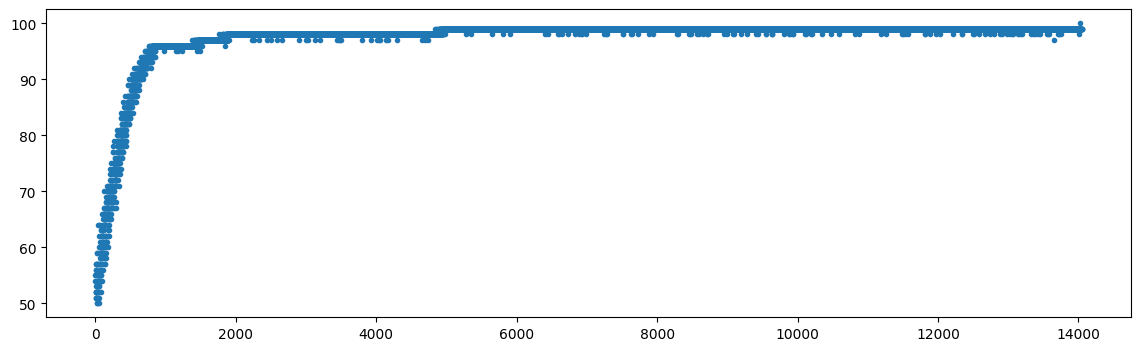

In [ ]:
history = np.array(history)
plt.figure(figsize=(14, 4))
plt.plot(history, ".")